In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
# Import data

data = pd.read_csv('https://raw.githubusercontent.com/jshumway0475/Predictive-Analytics/main/data_10-05-2021.csv')

In [3]:
# Review dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3978 entries, 0 to 3977
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LandValue      3978 non-null   int64  
 1   BuildingValue  3978 non-null   int64  
 2   Acres          3978 non-null   float64
 3   AboveSpace     3978 non-null   int64  
 4   Basement       3978 non-null   int64  
 5   Deck           3978 non-null   int64  
 6   Baths          3978 non-null   int64  
 7   Toilets        3978 non-null   int64  
 8   Fireplaces     3978 non-null   int64  
 9   Beds           3978 non-null   int64  
 10  Rooms          3978 non-null   int64  
 11  AC             3978 non-null   int64  
 12  Age            3978 non-null   float64
 13  Car            3978 non-null   int64  
 14  Condition      3978 non-null   object 
 15  Price          3978 non-null   int64  
dtypes: float64(2), int64(13), object(1)
memory usage: 497.4+ KB


In [4]:
# Review descriptive statistics
data.describe()


,LandValue,BuildingValue,Acres,AboveSpace,Basement,Deck,Baths,Toilets,Fireplaces,Beds,Rooms,AC,Age,Car,Price
count,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000,3978.000000
mean,21635.133233,90276.395173,0.223467,1151.394419,119.667672,74.558069,1.251131,0.221719,0.285571,2.679487,2.686526,0.779286,64.029211,69.772499,57779.887129
std,10723.218476,45007.161203,0.177030,420.885002,226.180729,123.607591,0.494912,0.435548,0.503344,0.756889,0.882327,0.414780,34.191570,167.686951,69169.419597
min,2300.000000,4700.000000,0.050000,412.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,15400.000000,60500.000000,0.160000,864.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,1.000000,49.225000,0.000000,0.000000
50%,20100.000000,83400.000000,0.180000,1048.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,3.000000,1.000000,61.800000,0.000000,0.000000
75%,26600.000000,109475.000000,0.230000,1352.000000,200.000000,128.000000,1.000000,0.000000,1.000000,3.000000,3.000000,1.000000,86.500000,0.000000,112789.000000
max,132900.000000,576600.000000,5.570000,5112.000000,1842.000000,1476.000000,4.000000,2.000000,3.000000,7.000000,8.000000,1.000000,1375.700000,1000.000000,664874.000000


In [5]:
# Remove data with $0 for Price
data_clean = data[data['Price'] != 0]

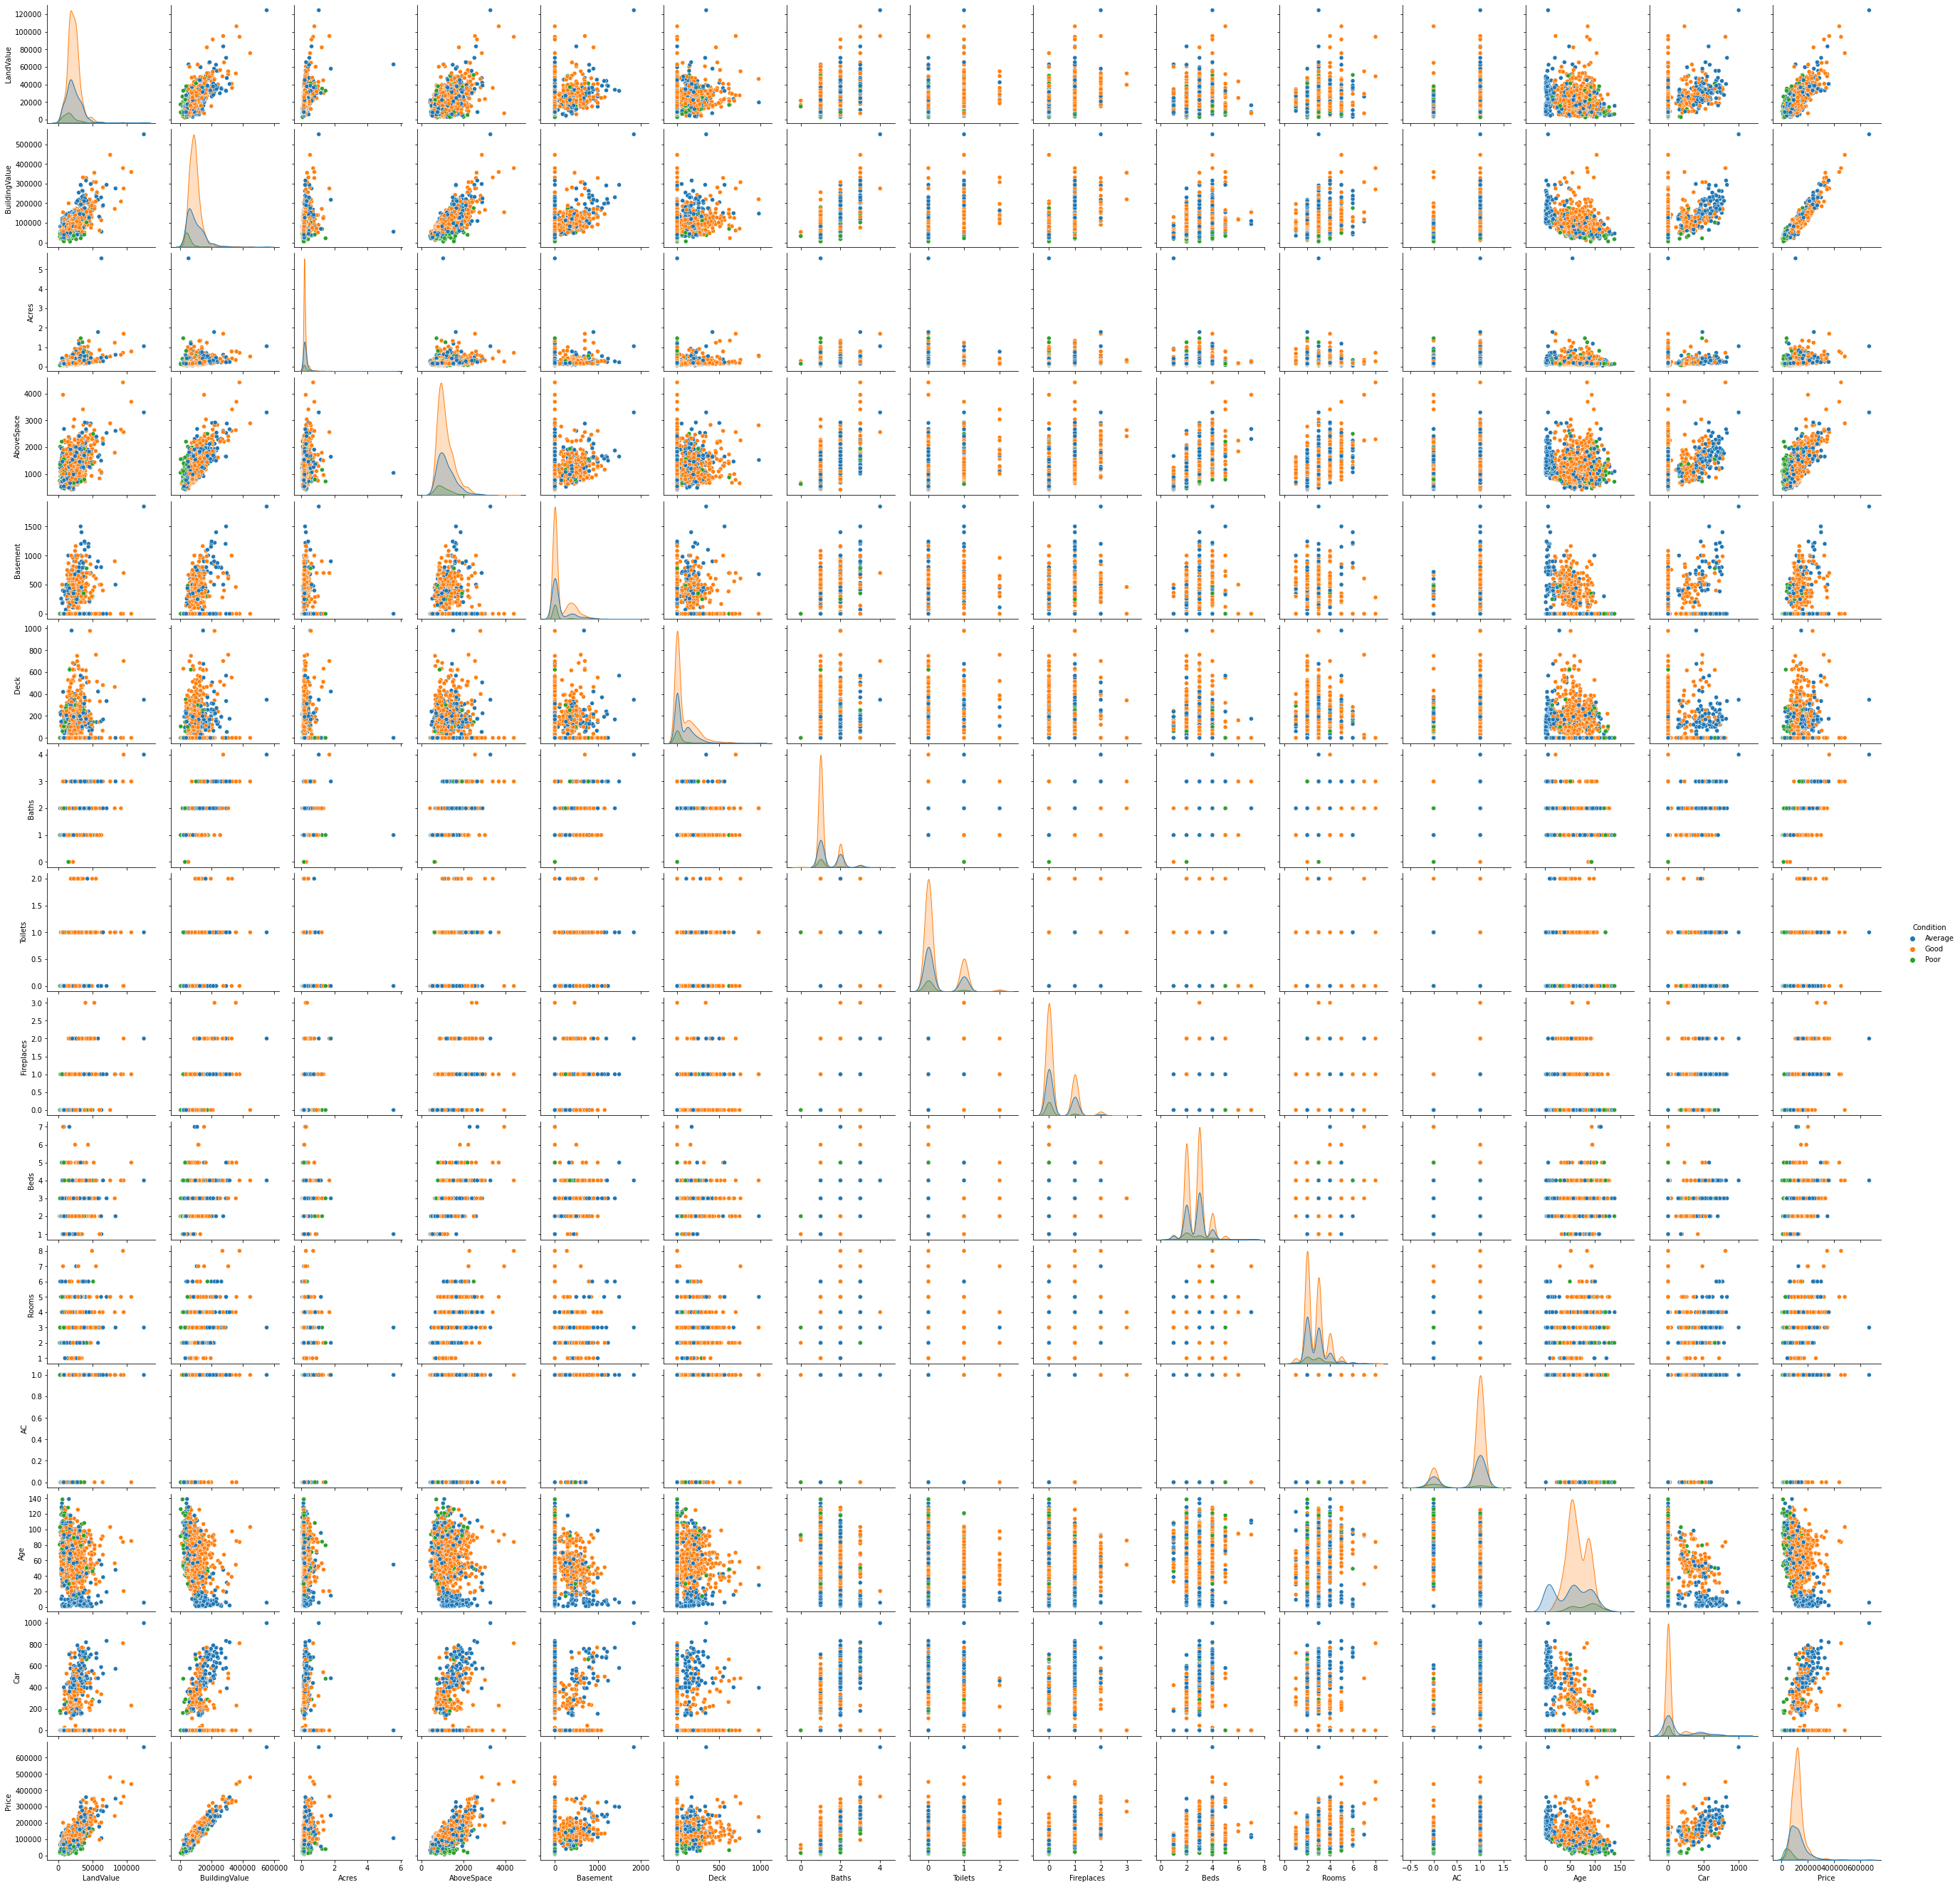

In [6]:
# View pairplot of data
sns.pairplot(data_clean, hue = 'Condition')

In [7]:
# Prepare data for regression by creating dummy variables for Condition
condition_dummy = pd.get_dummies(data_clean['Condition'])
data_numeric = pd.merge(data_clean, condition_dummy, how = 'left', left_index = True, right_index = True)
data_numeric.columns

Index(['LandValue', 'BuildingValue', 'Acres', 'AboveSpace', 'Basement', 'Deck',
       'Baths', 'Toilets', 'Fireplaces', 'Beds', 'Rooms', 'AC', 'Age', 'Car',
       'Condition', 'Price', 'Average', 'Good', 'Poor'],
      dtype='object')

In [8]:
# Split data into test and train sets for model1
X, y = data_numeric[['LandValue', 'BuildingValue', 'Acres', 'AboveSpace', 'Basement', 'Deck', 'Baths', 'Toilets', 
                    'Fireplaces', 'Beds', 'Rooms', 'AC', 'Age', 'Car', 'Average', 'Good']], data_numeric['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 123)

In [9]:
# Regression model 1
model1 = sm.OLS(y_train, X_train).fit()
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              4414.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):                        0.00
Time:                        19:27:27   Log-Likelihood:                         -13190.
No. Observations:                1186   AIC:                                  2.641e+04
Df Residuals:                    1170   BIC:                                  2.649e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

R2 of predictions on test data set = 0.9062


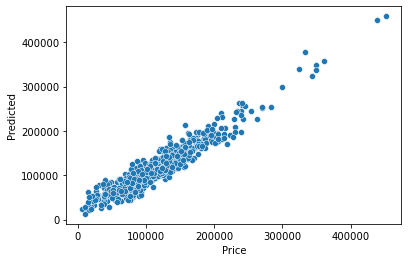

In [10]:
# Evaluate model
y_pred = model1.predict(X_test)
y_test = pd.DataFrame(y_test)
y_test['Predicted'] = y_pred
y_test.dropna(inplace = True)
y_test['Price'] = pd.to_numeric(y_test.Price)
sns.scatterplot(x = 'Price', y = 'Predicted', data = y_test)
print(f'R2 of predictions on test data set = {round(y_test["Price"].corr(y_test["Predicted"])**2, 4)}')

In [11]:
# Perform step-wise regression, by dropping independent variables that have p-values >= 0.5
max_pvalue = max(model1.pvalues)
while max_pvalue >= 0.05:
    drop_var = model1.pvalues[model1.pvalues == max(model1.pvalues)].index[0]
    X_train.drop(columns = drop_var, axis = 1, inplace = True)
    X_test.drop(columns = drop_var, axis = 1, inplace = True)
    model1 = sm.OLS(y_train, X_train).fit()
    max_pvalue = max(model1.pvalues)
print(model1.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.983
Method:                 Least Squares   F-statistic:                              8804.
Date:                Tue, 05 Oct 2021   Prob (F-statistic):                        0.00
Time:                        19:27:28   Log-Likelihood:                         -13195.
No. Observations:                1186   AIC:                                  2.641e+04
Df Residuals:                    1178   BIC:                                  2.645e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

C:\Users\jshum\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\jshum\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\jshum\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\jshum\anaconda3\lib

R2 of predictions on test data set = 0.9048


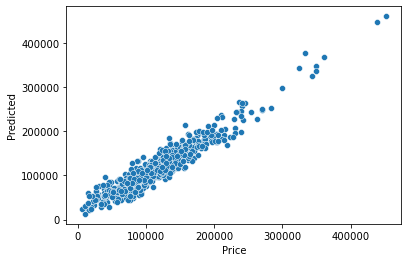

In [12]:
# Evaluate model
y_pred = model1.predict(X_test)
y_test = pd.DataFrame(y_test)
y_test['Predicted'] = y_pred
y_test.dropna(inplace = True)
y_test['Price'] = pd.to_numeric(y_test.Price)
sns.scatterplot(x = 'Price', y = 'Predicted', data = y_test)
print(f'R2 of predictions on test data set = {round(y_test["Price"].corr(y_test["Predicted"])**2, 4)}')

In [13]:
# Prep datset for k-means clustering. Uses StandardScaler from sklearn on the dataset to normalize (uses z-score)
# Input array for normalization. Only including continuous independent variables that meet the significance threshold of 0.05 from stepwise regression
norm_array = data_clean[['LandValue', 'BuildingValue', 'Acres', 'AboveSpace', 'Age']]

# Standardizing the features
x = StandardScaler().fit_transform(norm_array)

# Create dataframe for k-means clustering analysis
kmeans_array = pd.DataFrame(x, columns = norm_array.columns)
array_add = data_numeric[['Fireplaces', 'Average', 'Good', 'Poor']]
kmeans_array = pd.merge(kmeans_array, array_add, how = 'inner', left_index = True, right_index = True)

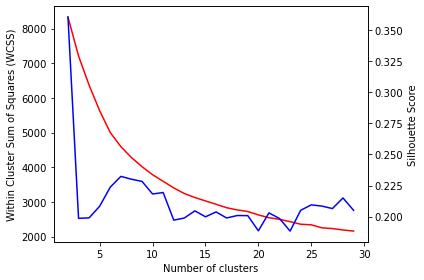

In [14]:
# Identify number of clusters to use in K-means using wcss-elbow method
# Elbow test
N = 30 # maximum number of clusters to test
wcss = []
silhouette = []

for n in range(2, N):
    kmeans = KMeans(n).fit(kmeans_array)
    cluster_id = kmeans.fit_predict(kmeans_array)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    score = metrics.silhouette_score(kmeans_array, cluster_id, metric = 'euclidean')
    silhouette.append(score)

# Plot results
cluster_ct = range(2, N)
fig, ax1 = plt.subplots()
ax1.plot(cluster_ct, wcss, color = 'red')
ax1.set_ylabel('Within Cluster Sum of Squares (WCSS)')
ax1.grid(False)
ax2 = ax1.twinx()
ax2.plot(cluster_ct, silhouette, color = 'blue')
ax2.set_ylabel('Silhouette Score')
ax2.grid(False)
ax1.set_xlabel('Number of clusters')
fig.tight_layout()

In [69]:
# Perform K-means calculations on selected array
N = 4
clusters = KMeans(N).fit(kmeans_array)
cluster_id = clusters.fit_predict(kmeans_array)

# Print silhouette score
print(f'The silhouette score for {N} clusters is {round(metrics.silhouette_score(kmeans_array, cluster_id, metric = "euclidean"), 6)}')

# Add cluster id to dataframe
kmeans_array['Cluster_ID'] = cluster_id
norm_array['Cluster_ID'] = cluster_id

The silhouette score for 4 clusters is 0.29285


<ipython-input-69-6a8fc9bab3a0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  norm_array['Cluster_ID'] = cluster_id


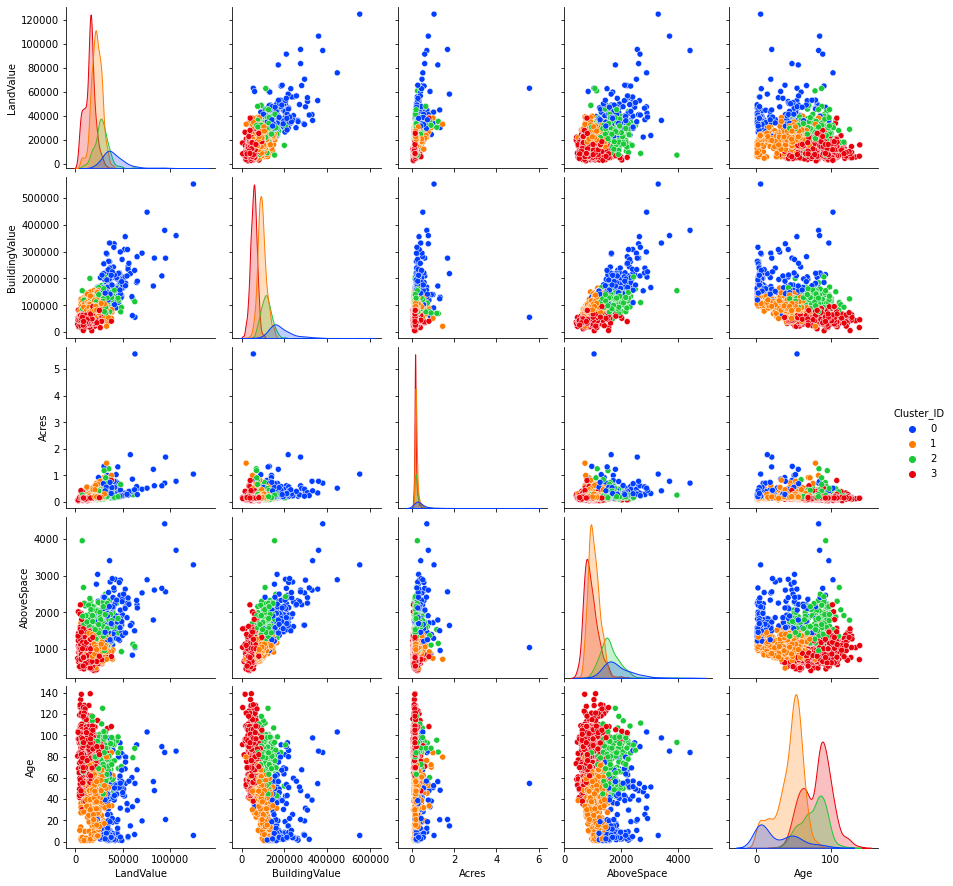

In [70]:
# Generate scatter plot representing clusters on unnormalized continuous variables
sns.pairplot(data = norm_array, hue = 'Cluster_ID', palette = 'bright')

In [71]:
# Descriptive Statistics by cluster groups for the fields used in k-means cluster analysis
print(pd.pivot_table(kmeans_array, values = 'Cluster_ID', index = cluster_id, aggfunc = 'count').T) # Using a single column for the count since they all have the same counts
print(pd.pivot_table(kmeans_array, index = cluster_id, aggfunc = ['mean', 'std']).T)

              0    1    2    3
Cluster_ID  182  780  323  693
                           0         1         2         3
mean AboveSpace     1.649453 -0.305187  0.984508 -0.548558
     Acres          0.982622 -0.022360  0.075721 -0.268188
     Age           -1.204788 -0.607257  0.562063  0.737930
     Average        0.598901  0.262821  0.117647  0.349206
     BuildingValue  2.040792  0.044679  0.485925 -0.812738
     Cluster_ID     0.000000  1.000000  2.000000  3.000000
     Fireplaces     0.967033  0.201282  0.662539  0.077922
     Good           0.384615  0.717949  0.863777  0.512266
     LandValue      1.829146 -0.005869  0.469409 -0.692563
     Poor           0.016484  0.019231  0.018576  0.138528
std  AboveSpace     1.208639  0.461562  0.811030  0.596733
     Acres          2.569287  0.586400  0.748558  0.393335
     Age            0.979332  0.640658  0.600230  0.698311
     Average        0.491473  0.440448  0.322690  0.477064
     BuildingValue  1.396960  0.447499  0.545624  0.3

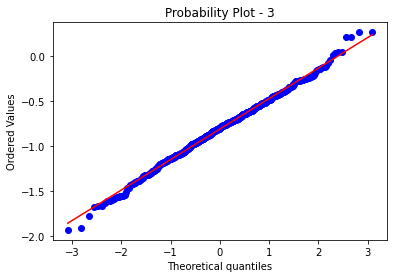

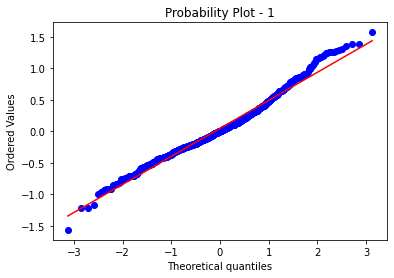

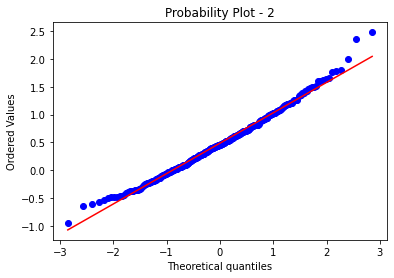

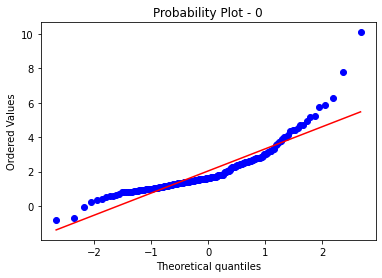

In [72]:
# Normality test of Num_App_Recieved_Norm by Cluster_ID. Field is not normally distributed.
unique_clusters = kmeans_array['Cluster_ID'].unique()
for cluster in unique_clusters:
    stats.probplot(kmeans_array[kmeans_array['Cluster_ID'] == cluster]['BuildingValue'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  str(cluster))
    plt.show()

In [73]:
# Validate clusters using ANOVA
# Create ANOVA backbone table
data_table = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data_table, columns = ['Source of Variation', 'SS', 'df', 'MS', 'F', 'P-value', 'F crit']) 
anova_table.set_index('Source of Variation', inplace = True)

# calculate SSTR and update anova table
x_bar = kmeans_array['BuildingValue'].mean()
SSTR = kmeans_array.groupby('Cluster_ID').count() * (kmeans_array.groupby('Cluster_ID').mean() - x_bar)**2
anova_table['SS']['Between Groups'] = SSTR['BuildingValue'].sum()

# calculate SSE and update anova table
SSE = (kmeans_array.groupby('Cluster_ID').count() - 1) * kmeans_array.groupby('Cluster_ID').std()**2
anova_table['SS']['Within Groups'] = SSE['BuildingValue'].sum()

# calculate SSTR and update anova table
SSTR = SSTR['BuildingValue'].sum() + SSE['BuildingValue'].sum()
anova_table['SS']['Total'] = SSTR

# update degree of freedom
anova_table['df']['Between Groups'] = kmeans_array['Cluster_ID'].nunique() - 1
anova_table['df']['Within Groups'] = kmeans_array.shape[0] - kmeans_array['Cluster_ID'].nunique()
anova_table['df']['Total'] = kmeans_array.shape[0] - 1

# calculate MS
anova_table['MS'] = anova_table['SS'] / anova_table['df']

# calculate F 
F = anova_table['MS']['Between Groups'] / anova_table['MS']['Within Groups']
anova_table['F']['Between Groups'] = F

# p-value
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# F critical 
alpha = 0.05
# possible types "right-tailed, left-tailed, two-tailed"
tail_hypothesis_type = "two-tailed"
if tail_hypothesis_type == "two-tailed":
    alpha /= 2
anova_table['F crit']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['df']['Between Groups'], anova_table['df']['Within Groups'])

# Final ANOVA Table
anova_table

,SS,df,MS,F,P-value,F crit
Source of Variation,,,,,,
Between Groups,1293.581167,3,431.193722,1243.648431,0.0,3.122732
Within Groups,684.418833,1974,0.346717,,,
Total,1978.0,1977,1.000506,,,


In [74]:
# Prepare dataset for PCA per problem d
pca_array = data_numeric[['LandValue', 'BuildingValue', 'Acres', 'AboveSpace', 'Basement', 'Deck', 'Baths', 'Toilets', 'Fireplaces', 'Beds', 'Rooms', 'AC', 'Age', 'Car']]

In [75]:
# Perform PCA calcs
n_components = 2
pca = PCA(n_components)
principalComponents = pca.fit_transform(pca_array)

# Calculate the explained variance ratio
print(f'{round(np.sum(pca.explained_variance_ratio_)*100, 2)}% of variance is described by {n_components} components')

99.99% of variance is described by 2 components


In [76]:
# Add column names to PCA output and review PCA component loading

loadings = pd.DataFrame(pca.components_.T, columns = ['PC1', 'PC2'], index = pca_array.columns)
loadings['PC1'] = loadings['PC1'].map('{:,.4f}'.format)
loadings['PC2'] = loadings['PC2'].map('{:,.4f}'.format)
loadings

,PC1,PC2
LandValue,0.1655,0.9862
BuildingValue,0.9862,-0.1655
Acres,0.0000,0.0000
AboveSpace,0.0069,-0.0031
Basement,0.0020,-0.0009
Deck,0.0008,-0.0001
Baths,0.0000,-0.0000
Toilets,0.0000,0.0000
Fireplaces,0.0000,0.0000
Beds,0.0000,-0.0000


In [77]:
# Prepare dataframe for regression 3 (problem e)
reg3_data = pd.DataFrame(principalComponents)
reg3_add = data_numeric['Price']
reg3_data = pd.merge(reg3_data, reg3_add, how = 'inner', left_index = True, right_index = True)
reg3_data.rename(columns = {0:'PC1', 1:'PC2'}, inplace = True)
reg3_data.head()

,PC1,PC2,Price
0,-41017.339092,-180.670985,74818
1,29055.322253,-11027.435563,137462
2,-29226.725819,578.145843,56850
3,39569.518785,-3361.830307,137462
4,7021.781388,-333.669677,131008


In [78]:
# Split data into test and train sets for model1
X, y = reg3_data[['PC1', 'PC2']], reg3_data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 123)

In [79]:
# Regression model3
model3 = sm.OLS(y_train, X_train).fit()
print(model3.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.155
Model:                            OLS   Adj. R-squared (uncentered):              0.154
Method:                 Least Squares   F-statistic:                              108.7
Date:                Tue, 05 Oct 2021   Prob (F-statistic):                    4.51e-44
Time:                        19:36:34   Log-Likelihood:                         -15531.
No. Observations:                1186   AIC:                                  3.107e+04
Df Residuals:                    1184   BIC:                                  3.108e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

R2 of predictions on test data set = 0.8899


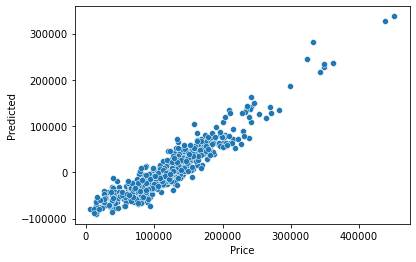

In [80]:
# Evaluate model3
y_pred = model3.predict(X_test)
y_test = pd.DataFrame(y_test)
y_test['Predicted'] = y_pred
y_test.dropna(inplace = True)
y_test['Price'] = pd.to_numeric(y_test.Price)
sns.scatterplot(x = 'Price', y = 'Predicted', data = y_test)
print(f'R2 of predictions on test data set = {round(y_test["Price"].corr(y_test["Predicted"])**2, 4)}')